In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy import sin, cos, tan, exp

# Defining the variables and equations of motion

In [2]:
X_LABEL = "x"
Y_LABEL = "v"

def DXDT(x, y):
    return(y)
    
def DYDT(x, y):
    return(-x)

# Rendering the phase portrait

In [3]:
# Setting plotting defaults 
X_MIN = -6
X_MAX = 6
Y_MIN = -6
Y_MAX = 6
RES = 0.5
Q_SCALE = 2.0

In [4]:
# Finding critical points

from scipy.optimize import fsolve
from itertools import product

## Needed for critical point solver, DO NOT CHANGE
def DDT(arg):
    x, y = arg
    return(DXDT(x, y), DYDT(x, y))

#
epsilon = 0.00001
res_c = 0.1

x = np.arange(X_MIN, X_MAX, res_c)
y = np.arange(Y_MIN, Y_MAX, res_c)
X, Y = np.meshgrid(x, y)

cp_x = []
cp_y = []
for x_0, y_0 in product(x, y):
    x_c, y_c =  fsolve(DDT, (x_0, y_0))
    if len(cp_x) == 0:
        cp_x.append(x_c)
        cp_y.append(y_c)
    else:
        d = np.sqrt((np.array(cp_x) - x_c)**2 + (np.array(cp_x) - y_c)**2)
        if (d > epsilon).all():
            cp_x.append(x_c)
            cp_y.append(y_c)

print("Critical points found at:")            
print([i for i in zip(cp_x,cp_y)])

/Users/badr/anaconda/envs/Python3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


Critical points found at:
[(0.0, 0.0)]


In [5]:
# Creating the Grid for plotting
x = np.arange(X_MIN, X_MAX, RES)
y = np.arange(Y_MIN, Y_MAX, RES)
X, Y = np.meshgrid(x, y)

# Caculating the change vectors
dxdt = Q_SCALE*DXDT(X, Y)
dydt = Q_SCALE*DYDT(X, Y)

Text(0, 0.5, 'v')

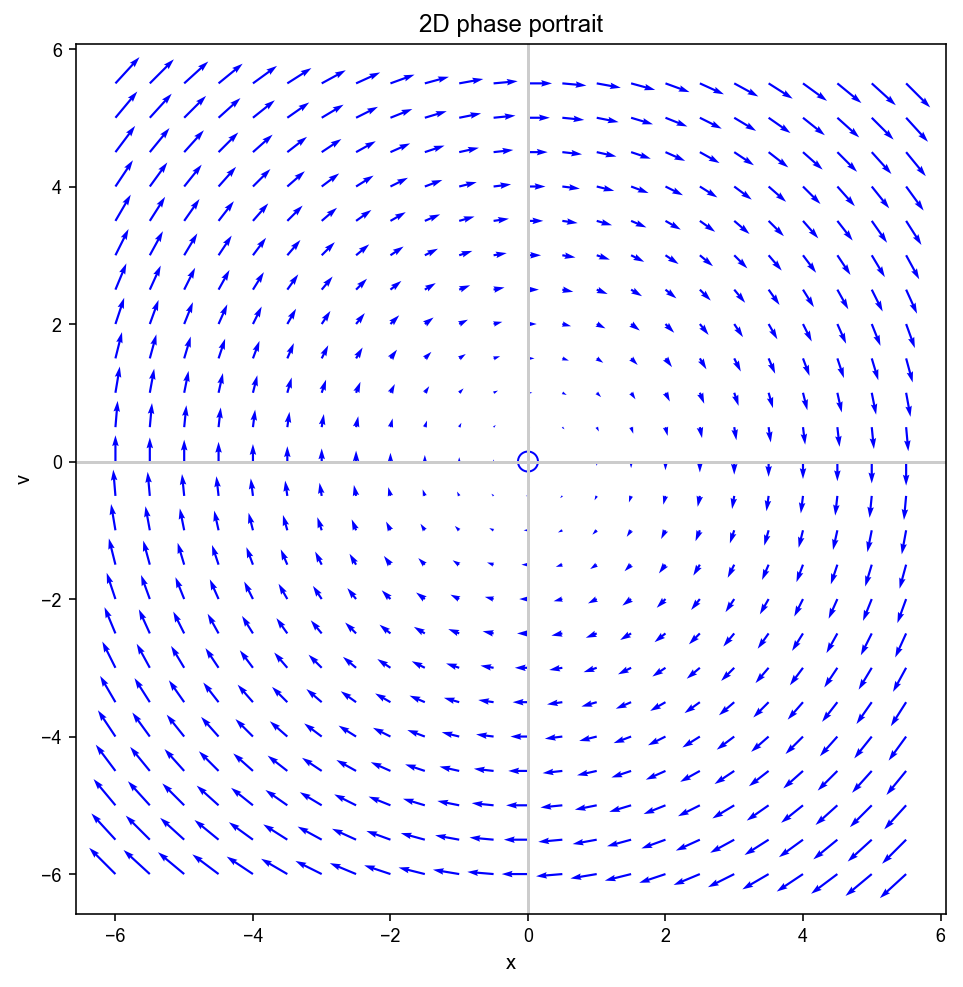

In [6]:
# Plotting the phase diagram

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,aspect='equal')

ax.axhline(0, color='.8')
ax.axvline(0, color='.8')
ax.scatter(cp_x, cp_y, s=100, color='blue', marker='o', facecolor='none')
ax.quiver(x, y, dxdt, dydt, color='blue')

ax.set_title("2D phase portrait")
ax.set_xlabel(X_LABEL)
ax.set_ylabel(Y_LABEL)

# Approximating dynamics near the critical points

In [67]:
def linearize(x, y, dx_func, dy_func, D=0.001):
    L = np.array(
        [[(dx_func(x+D,y) - dx_func(x-D,y)) / (2*D), (dx_func(x,y+D) - dx_func(x,y-D)) / (2*D)], 
        [(dy_func(x+D,y) - dy_func(x-D,y)) / (2*D), (dy_func(x,y+D) - dy_func(x,y-D)) / (2*D)]]
    )
    return(L)

def prettyprint_eig(M):
    from scipy.linalg import eig
    vals, mat = eig(M)
    for i in range(len(vals)):
        print(f"\tEigenvalue {i+1} is {vals[i]:.3}, with vector ({mat[0,i]:.3}, {mat[1,i]:.3})")

In [71]:
Ls = []
for i, (x, y) in enumerate(zip(cp_x, cp_y)):
    L = linearize(x, y, DXDT, DYDT)
    Ls.append(L)
    print(f" At critical point #{i}, ({x}, {y}), the functions are approximated by \n {L}\n")
    

 At critical point #0, (0.0, 0.0), the functions are approximated by 
 [[ 0.  1.]
 [-1.  0.]]



In [69]:
for i, (L, x, y) in enumerate(zip(Ls, cp_x, cp_y)):
    print(f"At critical point #{i}, ({x}, {y}),")
    prettyprint_eig(Ls[i])
    print("")

At critical point #0, (0.0, 0.0),
	Eigenvalue 1 is 1j, with vector ((0.707+0j), 0.707j)
	Eigenvalue 2 is -1j, with vector ((0.707-0j), -0.707j)

